原数据D： [[1, 2], [2, 5], [8, 7], [3, 6], [8, 8], [7, 3], [4, 5]]
第1轮R： [[1, 2]]
第1轮O： [[[2, 5], 3.1622776601683795], [[4, 5], 4.242640687119285], [[3, 6], 4.47213595499958], [[7, 3], 6.082762530298219], [[8, 7], 8.602325267042627], [[8, 8], 9.219544457292887]]
第1轮S： [3.16]
第2轮D： [[8, 7], [3, 6], [8, 8], [7, 3], [4, 5]]
第2轮R： [[1, 2], [2, 5]]
第2轮O： [[[3, 6], 1.4142135623730951], [[4, 5], 2.0], [[7, 3], 5.385164807134504], [[8, 7], 6.324555320336759], [[8, 8], 6.708203932499369]]
第2轮S： [3.16, 1.41]
第3轮D： [[8, 7], [8, 8], [7, 3], [4, 5]]
第3轮R： [[1, 2], [2, 5], [3, 6]]
第3轮O： [[[4, 5], 1.4142135623730951], [[7, 3], 5.0], [[8, 7], 5.0990195135927845], [[8, 8], 5.385164807134504]]
第3轮S： [3.16, 1.41, 1.41]
第4轮D： [[8, 7], [8, 8], [7, 3]]
第4轮R： [[1, 2], [2, 5], [3, 6], [4, 5]]
第4轮O： [[[7, 3], 3.605551275463989], [[8, 7], 4.47213595499958], [[8, 8], 5.0]]
第4轮S： [3.16, 1.41, 1.41, 3.61]
第5轮D： [[8, 7], [8, 8]]
第5轮R： [[1, 2], [2, 5], [3, 6], [4, 5], [7, 3]]
第5轮O： [[[8, 7], 4.123105625617661], [[8, 8],

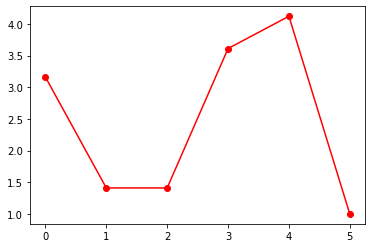

In [45]:
from cmath import inf
from math import sqrt
import random
import matplotlib.pyplot as plt


eps = inf   # 默认核心距离无穷大，则每个点都是核心点
min_sample = 2   # 默认最小邻域样本数为2，核心距离就是离自己最近样本点到自己的距离（样本点自身也是邻域元素之一）
D = [[1, 2], [2, 5],  [8, 7], [3, 6],  [8, 8], [7, 3], [4,5]]
print("原数据D：", D)
O = [] # 排序队列
R = [] # 结果队列
S = [] # 可达距离

R.append(D.pop(random.randint(0,6)))
print("第1轮R：", R)
nums = 1
while True:
    if len(D)<=0:
        break
    else:
        O = [] # 排序队列
        for x in D:   # 计算R中的点与D中其他点的距离，并按距离升序
            x_d = sqrt((R[-1][0] - x[0])**2 + (R[-1][1] - x[1])**2)
            O.append([x, x_d])
            O = sorted(O, key=lambda x: x[1], reverse=False)
        print(f"第{nums}轮O：", O)
        S.append(round(O[0][1],2))
        print(f"第{nums}轮S：", S)
        D.remove(O[0][0])   # 将距离最小的点从D中删除
        print(f"第{nums+1}轮D：", D)
        R.append(O[0][0])   # 将距离最小的点加到R中
        print(f"第{nums+1}轮R：", R)
        nums+=1

# 根据波峰来判断esp，波谷的数量可以近似看成聚类后的类别数量
plt.plot(range(len(S)), S, 'ro-')
plt.show()